<a href="https://colab.research.google.com/github/erichsiao1106/yolo3/blob/master/yolo_display2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
FOLDER_PATH = '/content/drive/My Drive/class/勞動部/week9/keras-yolo3-blood-cell'
import sys
sys.path.append(FOLDER_PATH)

In [ ]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
import os

Using TensorFlow backend.


In [ ]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/bccd_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep054-loss69.912-val_loss72.532.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
/content/drive/My Drive/class/勞動部/week9/keras-yolo3-blood-cell/ep054-loss69.912-val_loss72.532.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/class/勞動部/week9/keras-yolo3-blood-cell/dataset/train_img/BloodImage_00405.jpg
(640, 480) (416, 416)
(416, 416, 3)
Found 15 boxes for img
RBC 0.24 (309, 2) (449, 152)
RBC 0.45 (165, 128) (265, 216)
RBC 0.47 (184, 219) (281, 316)
RBC 0.53 (260, 235) (366, 329)
RBC 0.57 (0, 190) (67, 321)
RBC 0.76 (295, 337) (382, 452)
RBC 0.76 (102, 83) (205, 185)
RBC 0.77 (243, 0) (326, 84)
RBC 0.77 (157, 315) (253, 441)
RBC 0.85 (508, 205) (617, 303)
RBC 0.85 (478, 101) (577, 201)
RBC 0.91 (141, 5) (245, 90)
RBC 0.92 (54, 308) (163, 409)
Platelets 0.46 (365, 432) (391, 472)
WBC 0.79 (343, 248) (559, 446)
0.08357429700001262


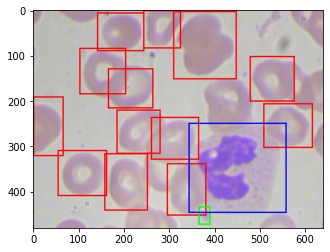

In [ ]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

In [ ]:
# COCO pre-trained
classes_path = os.path.join(FOLDER_PATH, 'model_data/coco_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'yolo_weights.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/class/勞動部/week9/keras-yolo3-blood-cell/yolo_weights.h5 model, anchors, and classes loaded.


/content/drive/My Drive/class/勞動部/week9/keras-yolo3-blood-cell/bear.jpeg
(1920, 1080) (416, 416)
(416, 416, 3)
Found 4 boxes for img
teddy bear 0.49 (0, 46) (413, 1067)
teddy bear 0.86 (1457, 121) (1915, 1052)
teddy bear 0.97 (837, 112) (1645, 1080)
teddy bear 0.98 (210, 123) (1074, 1026)
0.19233604199996535


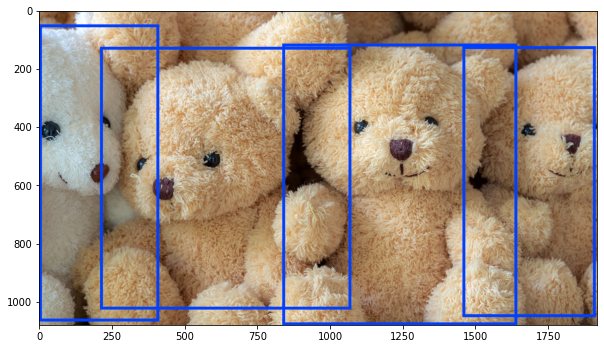

In [ ]:
path = os.path.join(FOLDER_PATH, 'bear.jpeg')
# path = os.path.join(FOLDER_PATH, 'street.jpeg')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(10,10))
plt.imshow(r_image)